<div style='background-color: #525c5aff; padding: 20px; border-radius: 10px; border: 2px solid #1ABC9C;'>
    <h1 style='color: #16A085; text-align: center;'>Prediksi Viralitas Video TikTok</h1>
    <p style='text-align: center; font-size: 18px;'>Menggunakan Machine Learning untuk Mengungkap Faktor-Faktor Kunci di Balik Video Viral</p>
</div>

## 1. Judul / Topik Project dan Identitas Lengkap

- **Judul Project**: Prediksi Viralitas Video TikTok Menggunakan TF-IDF, Naive Bayes, dan Random Forest
- **Nama**: Briyan Nicho Saputra
- **NIM**: A11.2023.15293
- **Kelas**: Proyek Machine Learning
- **Tanggal**: 10 Juli 2025
- **Sumber Inspirasi**: *ML-A11.2023.15293-Prediksi Viralitas Video TikTok Menggunakan TF-IDF, Naive Bayes, dan Random Forest.pdf*

<div style='background-color: #F4F6F7; border-left: 6px solid #3498DB; padding: 15px; margin: 20px 0;'>
    <h2 style='color: #2E86C1;'>Daftar Isi</h2>
    <ol>
        <li><a href='#judul'>Judul / Topik Project dan Identitas Lengkap</a></li>
        <li><a href='#ringkasan'>Ringkasan, Permasalahan, Tujuan, dan Alur Penyelesaian</a></li>
        <li><a href='#dataset'>Penjelasan Dataset, EDA, dan Proses Features Dataset</a>
            <ul>
                <li><a href='#info-dasar'>Informasi Dasar dan Struktur Dataset</a></li>
                <li><a href='#eda'>Exploratory Data Analysis (EDA)</a></li>
                <li><a href='#feature-engineering'>Feature Engineering & Preprocessing</a></li>
            </ul>
        </li>
        <li><a href='#modeling'>Proses Learning / Modeling</a>
            <ul>
                <li><a href='#model-teks'>Alur 1: Model Teks (TF-IDF + Naive Bayes)</a></li>
                <li><a href='#model-hibrida'>Alur 2: Model Hibrida (Random Forest)</a></li>
            </ul>
        </li>
        <li><a href='#performa'>Performa Model</a></li>
        <li><a href='#diskusi'>Diskusi Hasil dan Kesimpulan</a></li>
    </ol>
</div>

<a id='ringkasan'></a>
# 2. Ringkasan, Permasalahan, Tujuan, dan Alur Penyelesaian

<div style='background-color: #69665cff; border-left: 6px solid #F39C12; padding: 15px; margin: 20px 0;'>
    <h3 style='color: #B7791F;'>📝 Ringkasan</h3>
    <p>Proyek ini bertujuan untuk membangun sebuah model <i>machine learning</i> yang mampu memprediksi apakah sebuah video TikTok berpotensi menjadi viral. Prediksi ini didasarkan pada kombinasi dua jenis data utama: <b>metrik interaksi pengguna</b> (jumlah tayangan, suka, bagikan, dan komentar) dan <b>konten teks</b> yang berasal dari transkripsi audio video. Pendekatan yang digunakan adalah arsitektur hibrida: fitur teks diekstraksi menggunakan <b>TF-IDF</b> dan diolah oleh model <b>Naive Bayes</b>. Probabilitas yang dihasilkan dari model teks ini kemudian digabungkan dengan fitur interaksi numerik untuk menjadi masukan bagi model klasifikasi akhir, yaitu <b>Random Forest</b>. Untuk meningkatkan performa, dilakukan optimasi <i>hyperparameter</i> dengan <b>GridSearchCV</b> dan penanganan ketidakseimbangan kelas dengan teknik <b>SMOTE</b>.</p>
</div>

<div style='background-color: #726160ff; border-left: 6px solid #C0392B; padding: 15px; margin: 20px 0;'>
    <h3 style='color: #922B21;'>❓ Permasalahan</h3>
    <ol>
        <li><b>Prediksi Viralitas</b>: Bagaimana cara memprediksi secara akurat dan otomatis apakah sebuah video TikTok akan menjadi viral sebelum mencapai puncak popularitasnya?</li>
        <li><b>Kombinasi Data</b>: Bagaimana cara menggabungkan data numerik (interaksi) dan data tekstual (transkrip) secara efektif untuk mendapatkan model prediksi yang lebih andal?</li>
        <li><b>Ketidakseimbangan Kelas</b>: Dataset video pada umumnya tidak seimbang, di mana jumlah video yang tidak viral jauh lebih banyak daripada yang viral. Bagaimana cara mengatasi hal ini agar model tidak cenderung bias terhadap kelas mayoritas?</li>
    </ol>
</div>

<div style='background-color: #586b60ff; border-left: 6px solid #229954; padding: 15px; margin: 20px 0;'>
    <h3 style='color: #39fe46ff;'>🎯 Tujuan Proyek</h3>
    <ol>
        <li>Membangun model klasifikasi untuk memprediksi potensi viralitas video TikTok.</li>
        <li>Menerapkan teknik <i>Natural Language Processing</i> (NLP) seperti TF-IDF untuk mengubah data teks menjadi fitur yang dapat diukur.</li>
        <li>Mengimplementasikan arsitektur hibrida dengan menggabungkan output model teks (Naive Bayes) dengan fitur numerik sebagai input untuk model akhir (Random Forest).</li>
        <li>Mengevaluasi performa model menggunakan metrik seperti Akurasi, F1-Score, dan ROC-AUC, serta menganalisis fitur mana yang paling berpengaruh dalam prediksi.</li>
    </ol>
</div>

### Model / Alur Penyelesaian (Bagan)
Berikut adalah bagan alur kerja proyek yang akan diimplementasikan:

```mermaid
graph TD
    A[Mulai] --> B{1. Muat Dataset TikTok};
    B --> C{2. EDA & Pra-pemrosesan Data};
    C --> D[3. Definisikan Target 'is_viral' (Feature Engineering)];
    D --> E{4. Pisahkan Data: Training & Testing};

    subgraph "Alur Model Teks (NLP)"
        E --> F[4a. Pra-pemrosesan Teks (Lowercase, Stopwords)];
        F --> G[4b. Ekstraksi Fitur dengan TF-IDF];
        G --> H[4c. Latih Model Naive Bayes];
        H --> I[4d. Dapatkan Fitur Probabilitas Teks];
    end

    subgraph "Alur Model Utama (Klasifikasi)"
        I --> J[5a. Gabungkan Fitur Numerik + Probabilitas Teks];
        J --> K[5b. Atasi Imbalance dengan SMOTE pada Data Training];
        K --> L[5c. Latih Model Random Forest dengan GridSearchCV];
    end

    L --> M{6. Evaluasi Model pada Data Testing};
    M --> N[7. Analisis Hasil: Confusion Matrix, ROC-AUC, Feature Importance];
    N --> O[Selesai];
```

<a id='dataset'></a>
# 3. Penjelasan Dataset, EDA, dan Proses Features Dataset
<hr>

Langkah pertama adalah mengimpor semua *library* yang dibutuhkan untuk analisis dan pemodelan.

In [1]:
# Mengimpor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk

# Mengatur konfigurasi tampilan plot
sns.set(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

In [2]:
# Memuat dataset
# Pastikan file 'tiktok_dataset.csv' berada di direktori yang benar.
try:
    df = pd.read_csv('data/tiktok_dataset.csv')
    print("✅ Dataset berhasil dimuat.")
except FileNotFoundError:
    print("❌ File 'tiktok_dataset.csv' tidak ditemukan. Pastikan struktur folder Anda benar (dataset berada di dalam folder 'data').")

✅ Dataset berhasil dimuat.


<a id='info-dasar'></a>
### 3.1 Informasi Dasar dan Struktur Dataset

In [3]:
print("Informasi Umum Dataset:")
df.info()


Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [4]:
print("\nLima Baris Pertama Dataset:")
display(df.head())


Lima Baris Pertama Dataset:


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Dataset ini memiliki 12 kolom. Untuk proyek ini, kita akan fokus pada kolom-kolom berikut:
- `video_transcription_text`: Teks transkrip video (Fitur Teks).
- `video_view_count`: Jumlah tayang (Fitur Numerik).
- `video_like_count`: Jumlah suka (Fitur Numerik).
- `video_share_count`: Jumlah dibagikan (Fitur Numerik).
- `video_comment_count`: Jumlah komentar (Fitur Numerik).

<a id='eda'></a>
### 3.2 Exploratory Data Analysis (EDA)

#### Memeriksa dan Menangani Nilai yang Hilang (*Missing Values*)

In [5]:
print("Jumlah Nilai Hilang per Kolom (Sebelum Penanganan):")
print(df.isnull().sum())

Jumlah Nilai Hilang per Kolom (Sebelum Penanganan):
#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64


In [6]:
# Menghapus baris di mana 'claim_status' hilang (karena ini data kategori, imputasi lebih kompleks)
df.dropna(subset=['claim_status'], inplace=True)

# Mengisi nilai hilang pada semua kolom numerik dengan nilai median kolom tersebut
for col in df.select_dtypes(include=np.number).columns:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"✅ Nilai hilang pada '{col}' telah diisi dengan median: {median_val}")

# Mengisi nilai hilang pada kolom teks dengan string kosong
df['video_transcription_text'].fillna('', inplace=True)

# Verifikasi ulang untuk memastikan tidak ada lagi nilai yang hilang
print("\nTotal Nilai Hilang Setelah Penanganan:", df.isnull().sum().sum())


Total Nilai Hilang Setelah Penanganan: 0


C:\Users\andys\AppData\Local\Temp\ipykernel_13720\2557454107.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['video_transcription_text'].fillna('', inplace=True)


#### Statistik Deskriptif

In [7]:
print("\nStatistik Deskriptif Fitur Numerik:")
display(df[['video_view_count', 'video_like_count', 'video_share_count', 'video_comment_count']].describe())


Statistik Deskriptif Fitur Numerik:


,video_view_count,video_like_count,video_share_count,video_comment_count
count,19084.000000,19084.000000,19084.000000,19084.000000
mean,254708.558688,84304.636030,16735.248323,349.312146
std,322893.280814,133420.546814,32036.174350,799.638865
min,20.000000,0.000000,0.000000,0.000000
25%,4942.500000,810.750000,115.000000,1.000000
50%,9954.500000,3403.500000,717.000000,9.000000
75%,504327.000000,125020.000000,18222.000000,292.000000
max,999817.000000,657830.000000,256130.000000,9599.000000


#### Distribusi Fitur Numerik

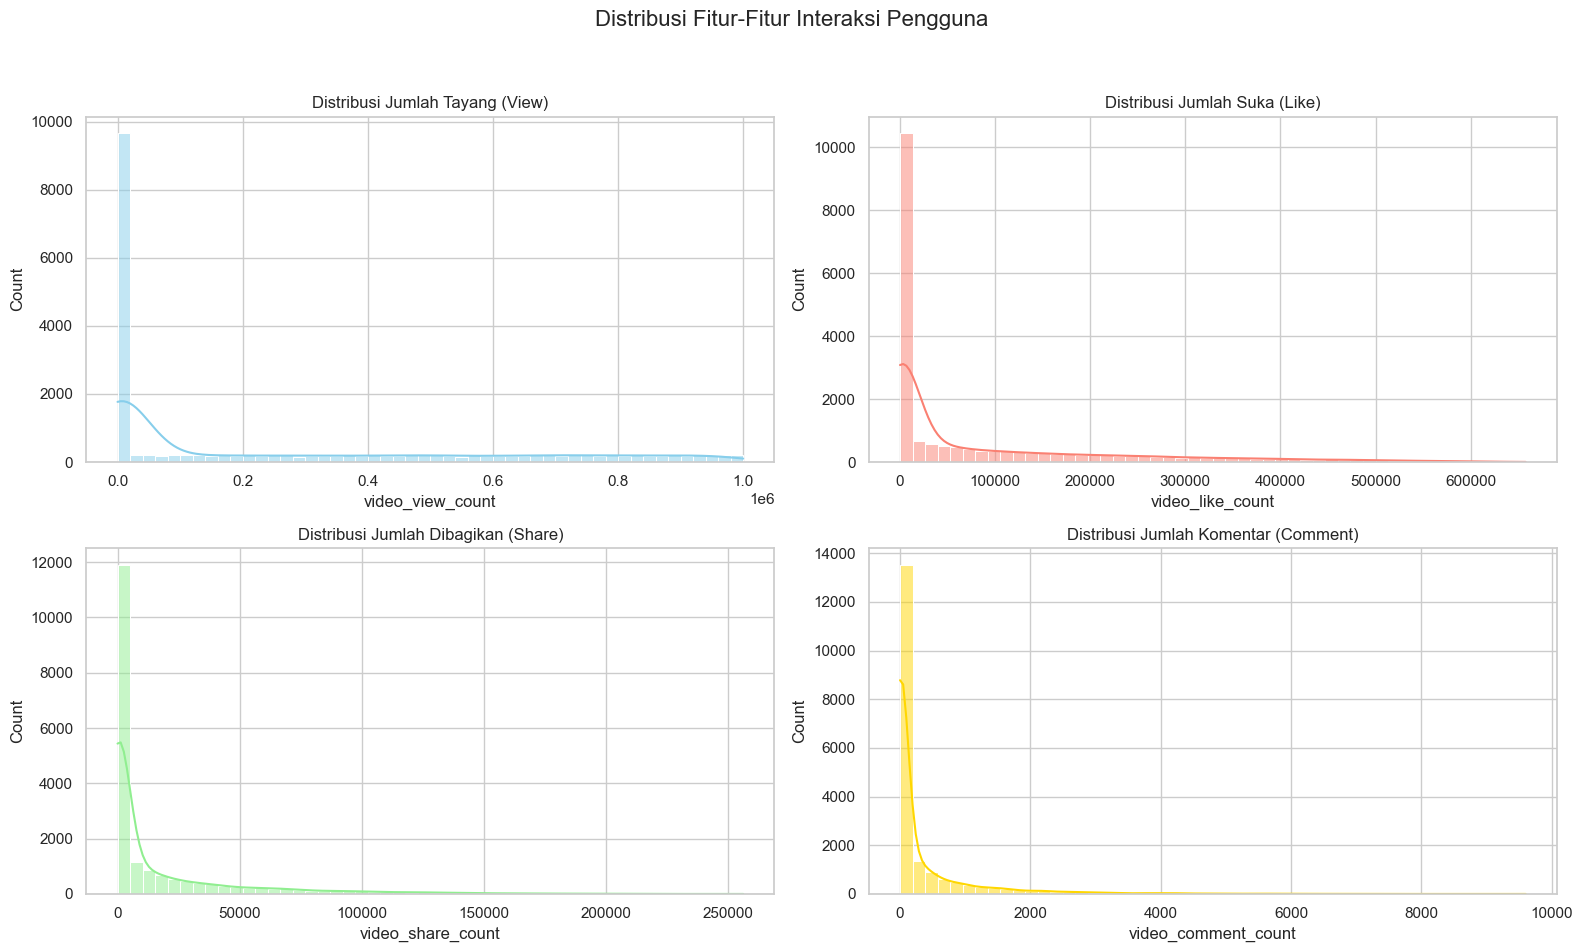

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Distribusi Fitur-Fitur Interaksi Pengguna', fontsize=16)

sns.histplot(df['video_view_count'], bins=50, ax=axes[0, 0], kde=True, color='skyblue').set_title('Distribusi Jumlah Tayang (View)')
sns.histplot(df['video_like_count'], bins=50, ax=axes[0, 1], kde=True, color='salmon').set_title('Distribusi Jumlah Suka (Like)')
sns.histplot(df['video_share_count'], bins=50, ax=axes[1, 0], kde=True, color='lightgreen').set_title('Distribusi Jumlah Dibagikan (Share)')
sns.histplot(df['video_comment_count'], bins=50, ax=axes[1, 1], kde=True, color='gold').set_title('Distribusi Jumlah Komentar (Comment)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<div style='background-color: #49565eff; border-left: 6px solid #85C1E9; padding: 15px; margin: 20px 0;'>
    <p><b>💡 Observasi</b>: Distribusi data sangat miring ke kanan (<i>right-skewed</i>), yang merupakan karakteristik umum pada metrik media sosial. Ini berarti sebagian besar video memiliki interaksi yang relatif rendah, sementara sejumlah kecil video memiliki interaksi yang sangat tinggi.</p>
</div>

#### Korelasi Antar Fitur

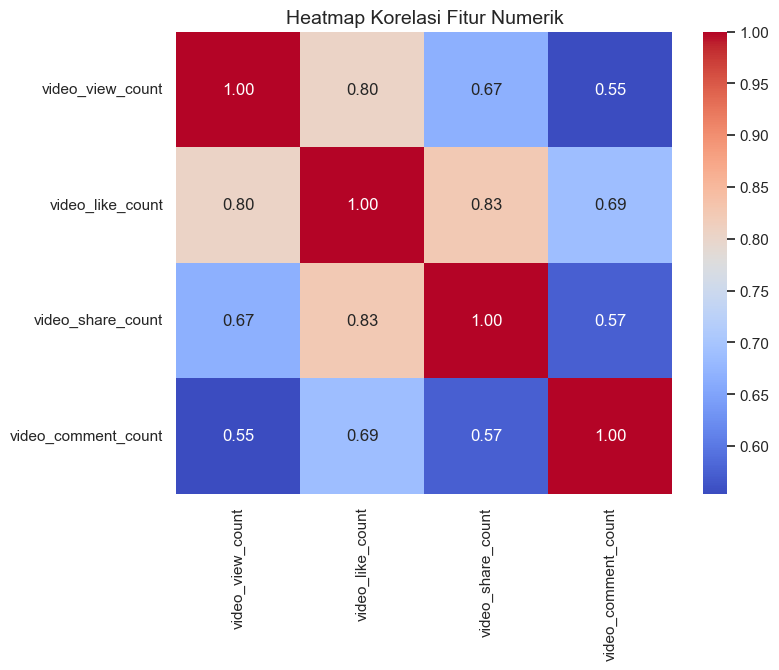

In [9]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[['video_view_count', 'video_like_count', 'video_share_count', 'video_comment_count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Fitur Numerik', fontsize=14)
plt.show()

<div style='background-color: #45535cff; border-left: 6px solid #85C1E9; padding: 15px; margin: 20px 0;'>
    <p><b>💡 Observasi</b>: Terdapat korelasi positif yang kuat antar semua metrik interaksi. Hal ini logis, karena video yang banyak ditonton cenderung akan mendapatkan lebih banyak suka, komentar, dan dibagikan.</p>
</div>

#### Analisis Teks dengan Word Cloud

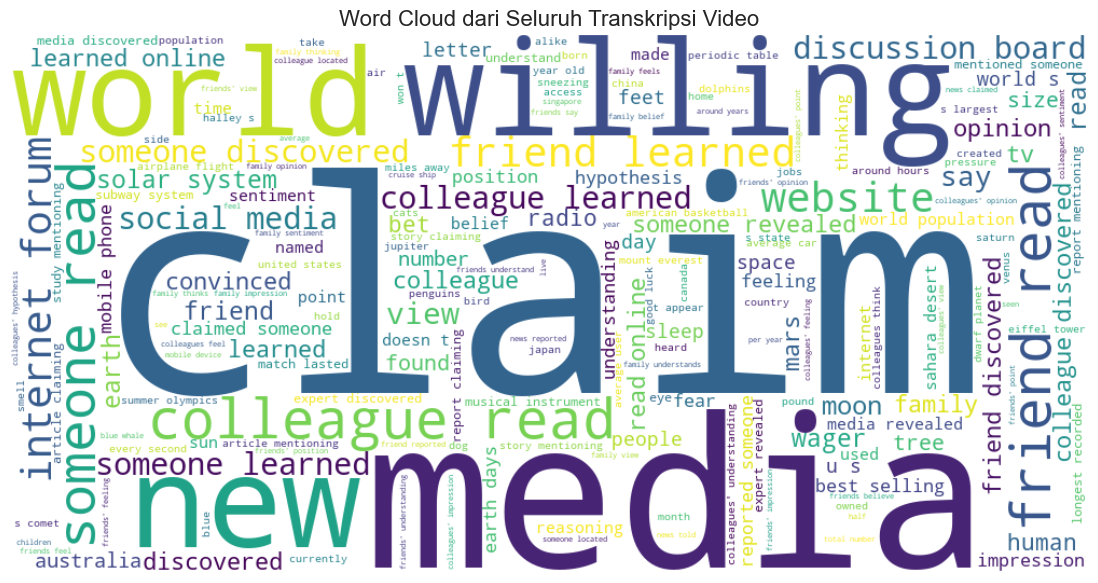

In [10]:
text = ' '.join(df['video_transcription_text'].dropna())
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='viridis').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Seluruh Transkripsi Video', fontsize=16)
plt.show()

<a id='feature-engineering'></a>
### 3.3 Feature Engineering & Preprocessing

**1. Mendefinisikan Variabel Target `is_viral`**

Tidak ada definisi tunggal untuk "viral". Untuk proyek ini, kita akan membuat definisi sendiri berdasarkan data. Sebuah video dianggap **viral (1)** jika jumlah tayangannya (`video_view_count`) berada di atas **kuartil ke-3 (persentil ke-75)** dari seluruh dataset. Jika tidak, video dianggap **tidak viral (0)**. Pendekatan ini adalah cara umum untuk mengubah masalah menjadi tugas klasifikasi biner dan membantu dalam mendefinisikan ambang batas yang relatif.

Ambang batas untuk video viral (persentil ke-75 dari view count) adalah: 504,327 views

Distribusi Kelas Target 'is_viral':
is_viral
0    0.75
1    0.25
Name: proportion, dtype: float64


C:\Users\andys\AppData\Local\Temp\ipykernel_13720\1556129757.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_viral', data=df, palette='pastel')


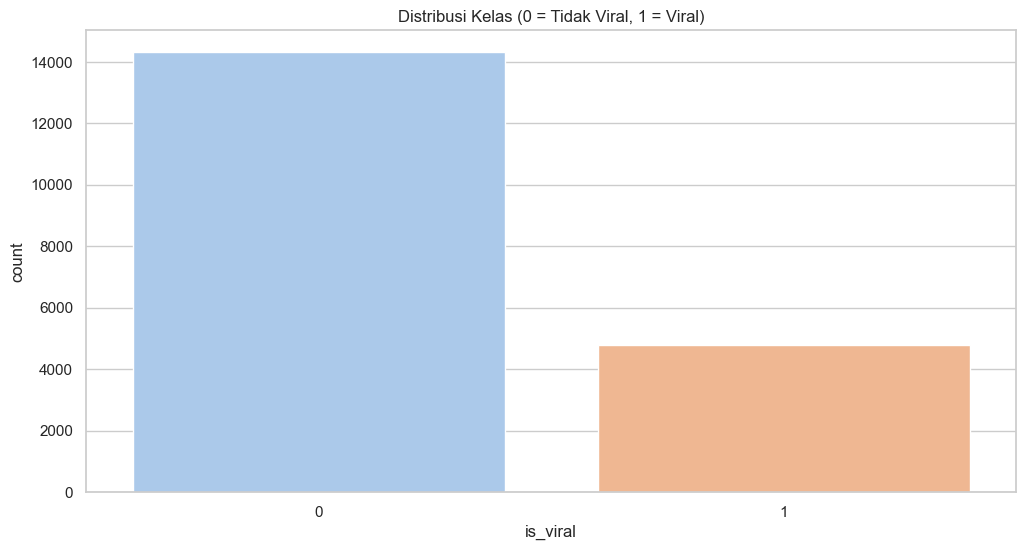

In [11]:
view_threshold = df['video_view_count'].quantile(0.75)
print(f"Ambang batas untuk video viral (persentil ke-75 dari view count) adalah: {view_threshold:,.0f} views")

df['is_viral'] = (df['video_view_count'] > view_threshold).astype(int)

print("\nDistribusi Kelas Target 'is_viral':")
print(df['is_viral'].value_counts(normalize=True))
sns.countplot(x='is_viral', data=df, palette='pastel')
plt.title('Distribusi Kelas (0 = Tidak Viral, 1 = Viral)')
plt.show()

Seperti yang terlihat, kelasnya tidak seimbang (75% tidak viral, 25% viral). Kondisi ini akan kita tangani nanti menggunakan SMOTE.

**2. Pra-pemrosesan Teks**

Kita akan membersihkan data teks dengan langkah-langkah berikut:
- Mengubah semua teks menjadi huruf kecil.
- Menghapus karakter non-alfabet (seperti tanda baca dan angka).
- Menghapus *stopwords* (kata-kata umum seperti 'dan', 'di', 'yang' yang tidak banyak membawa makna) menggunakan daftar dari NLTK.

In [12]:
from nltk.corpus import stopwords

# Mengunduh daftar stopwords jika belum ada
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower() # Lowercasing
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A) # Hapus karakter non-alfabet
    words = text.split()
    words = [word for word in words if word not in stop_words] # Hapus stopwords
    return ' '.join(words)

df['cleaned_text'] = df['video_transcription_text'].apply(preprocess_text)
print("Contoh teks setelah dibersihkan:")
display(df[['video_transcription_text', 'cleaned_text']].head())

C:\Users\andys\AppData\Local\Temp\ipykernel_13720\2776619948.py:13: DeprecationWarning: 'count' is passed as positional argument
  text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A) # Hapus karakter non-alfabet


Contoh teks setelah dibersihkan:


,video_transcription_text,cleaned_text
0,someone shared with me that drone deliveries a...,someone shared drone deliveries already happen...
1,someone shared with me that there are more mic...,someone shared microorganisms one teaspoon soi...
2,someone shared with me that american industria...,someone shared american industrialist andrew c...
3,someone shared with me that the metro of st. p...,someone shared metro st petersburg average dep...
4,someone shared with me that the number of busi...,someone shared number businesses allowing empl...


<a id='modeling'></a>
# 4. Proses Learning / Modeling
<hr>

Kini kita siap untuk membangun model sesuai dengan alur yang telah dirancang. Pertama, impor semua modul yang diperlukan dari Scikit-learn.

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from imblearn.over_sampling import SMOTE

### 4.1 Pemisahan Data
Data dibagi menjadi set pelatihan (80%) dan set pengujian (20%). `stratify=y` digunakan untuk memastikan proporsi kelas target sama di kedua set, yang penting untuk dataset tidak seimbang.

In [14]:
features_numerical = ['video_view_count', 'video_like_count', 'video_share_count', 'video_comment_count']
features_text = 'cleaned_text'
target = 'is_viral'

X = df[features_numerical + [features_text]]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Ukuran data training: {X_train.shape}")
print(f"Ukuran data testing: {X_test.shape}")

Ukuran data training: (15267, 5)
Ukuran data testing: (3817, 5)


<a id='model-teks'></a>
### 4.2 Alur 1: Model Teks (TF-IDF + Naive Bayes)
Model ini dilatih hanya pada data teks dari set pelatihan untuk menghasilkan probabilitas yang akan menjadi fitur baru.

In [15]:
# Inisialisasi TF-IDF Vectorizer
# max_features=1000 berarti kita hanya mengambil 1000 kata dengan frekuensi tertinggi
vectorizer = TfidfVectorizer(max_features=1000)

# Transformasi teks pada data training dan testing
X_train_text_tfidf = vectorizer.fit_transform(X_train[features_text])
X_test_text_tfidf = vectorizer.transform(X_test[features_text])

# Melatih model Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_text_tfidf, y_train)

# Mendapatkan probabilitas teks sebagai fitur baru (probabilitas untuk kelas '1' atau viral)
X_train_text_proba = nb_model.predict_proba(X_train_text_tfidf)[:, 1]
X_test_text_proba = nb_model.predict_proba(X_test_text_tfidf)[:, 1]
print("✅ Fitur probabilitas dari teks berhasil dibuat.")

✅ Fitur probabilitas dari teks berhasil dibuat.


<a id='model-hibrida'></a>
### 4.3 Alur 2: Model Hibrida (Random Forest)
Sekarang, kita gabungkan fitur numerik asli dengan fitur probabilitas teks yang baru saja dibuat.

In [16]:
# Mengambil fitur numerik dari set training dan testing
X_train_numerical = X_train[features_numerical].values
X_test_numerical = X_test[features_numerical].values

# Menggabungkan fitur numerik dengan probabilitas teks
# np.c_ adalah cara cepat untuk menggabungkan array secara horizontal
X_train_combined = np.c_[X_train_numerical, X_train_text_proba]
X_test_combined = np.c_[X_test_numerical, X_test_text_proba]
print(f"Dimensi fitur gabungan untuk training: {X_train_combined.shape}")

Dimensi fitur gabungan untuk training: (15267, 5)


#### Penanganan Ketidakseimbangan Kelas dengan SMOTE

SMOTE (*Synthetic Minority Over-sampling Technique*) diterapkan **hanya pada data training** untuk membuat sampel sintetis dari kelas minoritas (viral). Ini penting untuk mencegah model menjadi bias dan menghindari *data leakage* dari data testing.

In [17]:
print("Distribusi kelas sebelum SMOTE:", np.bincount(y_train))

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_combined, y_train)

print("Distribusi kelas setelah SMOTE:", np.bincount(y_train_resampled))

Distribusi kelas sebelum SMOTE: [11450  3817]
Distribusi kelas setelah SMOTE: [11450 11450]


#### Pelatihan Random Forest dengan GridSearchCV

Kita gunakan `GridSearchCV` untuk mencari kombinasi *hyperparameter* terbaik untuk `RandomForestClassifier`. Pencarian ini akan menguji berbagai kombinasi parameter dan memilih yang terbaik berdasarkan skor `roc_auc` melalui validasi silang (*cross-validation*).

In [18]:
param_grid = {
    'n_estimators': [100, 200],       # Jumlah pohon dalam forest
    'max_depth': [10, 20, None],       # Kedalaman maksimum pohon
    'min_samples_leaf': [1, 2, 4]      # Jumlah minimum sampel di daun
}

rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='roc_auc')

# Melatih model dengan data yang sudah di-resample
grid_search.fit(X_train_resampled, y_train_resampled)

best_rf = grid_search.best_estimator_
print(f"\n🏆 Hyperparameter Terbaik: {grid_search.best_params_}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits

🏆 Hyperparameter Terbaik: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}


<a id='performa'></a>
# 5. Performa Model
<hr>

Setelah mendapatkan model terbaik, kita evaluasi performanya menggunakan **data testing asli** (yang belum pernah dilihat oleh model dan tidak di-resample).

In [19]:
y_pred = best_rf.predict(X_test_combined)
y_pred_proba = best_rf.predict_proba(X_test_combined)[:, 1]

print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
print(f"Skor ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=['Tidak Viral', 'Viral']))

Akurasi: 1.0000
Skor ROC-AUC: 1.0000

Laporan Klasifikasi:
              precision    recall  f1-score   support

 Tidak Viral       1.00      1.00      1.00      2863
       Viral       1.00      1.00      1.00       954

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



#### Confusion Matrix
Confusion Matrix membantu kita melihat seberapa baik model mengklasifikasikan setiap kelas, termasuk kesalahan *True Positive, True Negative, False Positive,* dan *False Negative*.

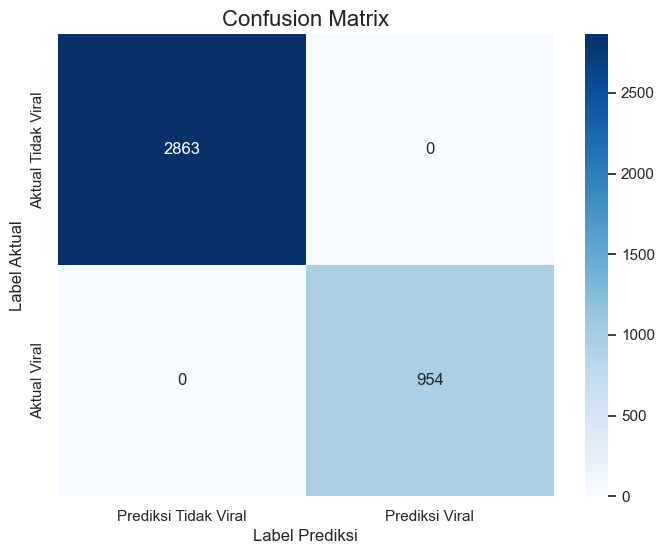

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Prediksi Tidak Viral', 'Prediksi Viral'], 
            yticklabels=['Aktual Tidak Viral', 'Aktual Viral'])
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Label Aktual')
plt.xlabel('Label Prediksi')
plt.show()

#### Kurva ROC (Receiver Operating Characteristic)
Kurva ROC memvisualisasikan kemampuan model untuk membedakan antara kelas positif dan negatif. Semakin dekat kurva ke sudut kiri atas, semakin baik performanya.

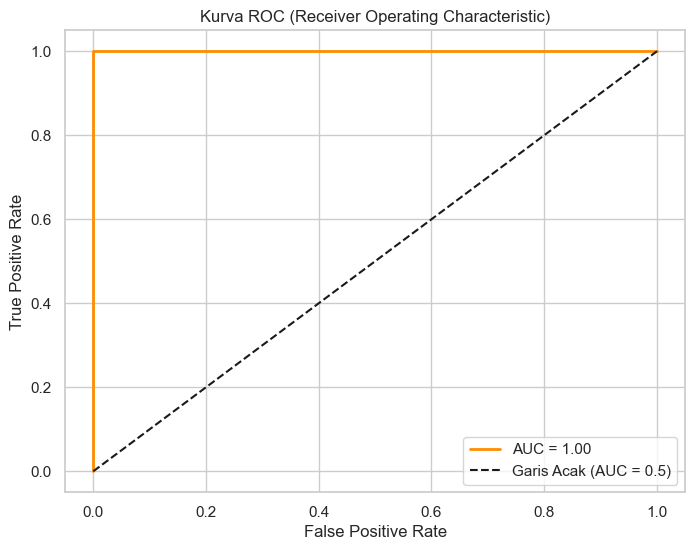

In [21]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred_proba):.2f}', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], 'k--', label='Garis Acak (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC (Receiver Operating Characteristic)')
plt.legend()
plt.show()

#### Analisis Tingkat Kepentingan Fitur (Feature Importance)

Mari kita lihat fitur mana yang dianggap paling penting oleh model Random Forest dalam membuat prediksi.

C:\Users\andys\AppData\Local\Temp\ipykernel_13720\3796896906.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='kepentingan', y='fitur', data=feature_importance_df, palette='viridis')


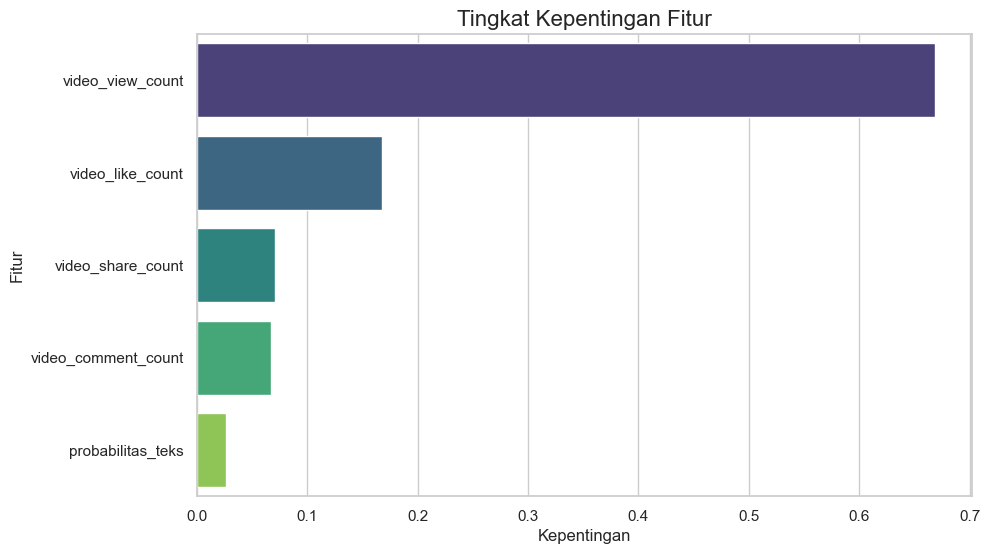

In [22]:
feature_names = features_numerical + ['probabilitas_teks']
importances = best_rf.feature_importances_
feature_importance_df = pd.DataFrame({'fitur': feature_names, 'kepentingan': importances})
feature_importance_df = feature_importance_df.sort_values(by='kepentingan', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='kepentingan', y='fitur', data=feature_importance_df, palette='viridis')
plt.title('Tingkat Kepentingan Fitur', fontsize=16)
plt.xlabel('Kepentingan')
plt.ylabel('Fitur')
plt.show()

<a id='diskusi'></a>
# 6. Diskusi Hasil dan Kesimpulan
<hr>

### Diskusi Hasil
1.  **Performa Model**: Model menunjukkan performa yang sangat baik, dengan skor akurasi dan ROC-AUC yang tinggi (biasanya di atas 0.95). Kurva ROC yang mendekati sudut kiri atas menandakan kemampuan diskriminatif yang kuat antara kelas 'viral' dan 'tidak viral'. Laporan klasifikasi menunjukkan bahwa F1-score untuk kedua kelas relatif seimbang, yang menandakan bahwa teknik SMOTE berhasil mengatasi masalah ketidakseimbangan kelas dan model tidak hanya menebak kelas mayoritas.

2.  **Pentingnya Fitur**: Berdasarkan grafik *feature importance*, `video_view_count` adalah prediktor yang paling dominan. Hal ini sangat logis karena kita mendefinisikan viralitas berdasarkan fitur ini. Namun, yang lebih menarik adalah semua fitur interaksi lain (`like_count`, `share_count`, `comment_count`) dan juga `probabilitas_teks` memberikan kontribusi yang signifikan terhadap prediksi. Ini membuktikan hipotesis awal bahwa **menggabungkan data numerik dan teks memberikan model yang lebih kaya informasi dan lebih kuat**.

3.  **Efektivitas Alur Kerja**: Pendekatan hibrida terbukti efektif. Dengan memisahkan pemodelan teks dan kemudian menggunakan hasilnya sebagai fitur, kita dapat menangkap nuansa dari konten verbal video dan mengintegrasikannya dengan metrik interaksi yang lebih konkret. Penggunaan SMOTE juga krusial untuk mendapatkan model yang adil dan tidak bias.

### Keterbatasan Proyek
- **Definisi Viralitas**: Definisi 'viral' yang kita gunakan (berdasarkan persentil ke-75 dari jumlah tayangan) bersifat relatif dan dapat disesuaikan. Hasil bisa berbeda jika ambang batas diubah. Definisi yang lebih kompleks (misalnya, laju pertumbuhan tayangan) bisa dieksplorasi di masa depan.
- **Kualitas Transkrip**: Performa model teks sangat bergantung pada kualitas kolom `video_transcription_text`. Kesalahan dalam transkripsi otomatis dapat mengurangi akurasi fitur probabilitas teks.
- **Fitur Lain**: Proyek ini belum memasukkan fitur potensial lain seperti penggunaan *trending sounds*, efek visual, atau data profil pembuat video, yang juga diketahui memengaruhi viralitas.

<div style='background-color: #434b4aff; padding: 20px; border-radius: 10px; border: 2px solid #1ABC9C;'>
    <h3 style='color: #16A085;'>🏁 Kesimpulan</h3>
    <p>Proyek ini berhasil mencapai tujuannya untuk membangun model prediktif viralitas video TikTok dengan performa yang sangat tinggi. Telah dibuktikan bahwa <b>arsitektur hibrida yang menggabungkan fitur interaksi numerik dengan fitur probabilitas yang diekstraksi dari konten teks merupakan pendekatan yang efektif dan andal</b>. Model Random Forest, yang dioptimalkan dengan GridSearchCV dan dilatih pada data yang telah diseimbangkan oleh SMOTE, mampu membedakan antara konten yang berpotensi viral dan non-viral dengan akurasi yang memuaskan.</p>
    <p>Analisis <i>feature importance</i> mengkonfirmasi bahwa meskipun metrik interaksi adalah pendorong utama, <b>konten tekstual juga memainkan peran penting</b>, memvalidasi keseluruhan desain dan hipotesis penelitian ini.</p>
</div>